# Code to generate all figures on heatwaves events used in the paper
## note this is spread across multiple figures
## TODO: Update the specific list once we are done

In [1]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics
sns.set_theme(style='whitegrid')
from shapely.geometry import Polygon
import shapely
from pathlib import Path
import multiprocessing
from datetime import timedelta, datetime
from matplotlib.patches import Patch
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import xarray as xr

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

In [2]:
# setup the templates to load in the data

# Forecast Examples
cira_heatwave_forecast_FOURv2_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 IFS",
)

cira_heatwave_forecast_GC_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC IFS",
)

cira_heatwave_forecast_PANG_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG IFS",
)

cira_heatwave_forecast_FOURv2_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 GFS",
)

cira_heatwave_forecast_GC_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC GFS",
)

cira_heatwave_forecast_PANG_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG GFS",
)

hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=["surface_air_temperature"],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
    name="ECMWF HRES",
)

heat_metrics = [
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ]

FOURv2_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
]

GC_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
]

PANG_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
]

HRES_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]

In [3]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

fourv2_color = sns_palette[0]
gc_color = sns_palette[1]
pangu_color = sns_palette[2]
hres_color = sns_palette[3]

ifs_color = sns_palette[0]
gfs_color = sns_palette[3]

In [4]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()

# turn the dictionary into a list of case objects ()
ewb_cases = cases.load_individual_cases(case_dict)

ewb_fourv2 = evaluate.ExtremeWeatherBench(case_dict, FOURv2_HEAT_EVALUATION_OBJECTS)
ewb_gc = evaluate.ExtremeWeatherBench(case_dict, GC_HEAT_EVALUATION_OBJECTS)
ewb_pang = evaluate.ExtremeWeatherBench(case_dict, PANG_HEAT_EVALUATION_OBJECTS)
ewb_hres = evaluate.ExtremeWeatherBench(case_dict, HRES_HEAT_EVALUATION_OBJECTS)

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


# the next two cells either load in your results from scratch (first cell) or you can load them from a saved pickle file (must faster)

In [ ]:
# load in the results for all heat waves in parallel
# this will take awhile to run if you do them all in one code box 
# if you have already saved them (from running this once), then skip this box
n_threads_per_process = 4
n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

fourv2_results = ewb_fourv2.run(parallel=True, n_jobs=n_processes, pre_compute=True)
gc_results = ewb_gc.run(parallel=True, n_jobs=n_processes, pre_compute=True)
pang_results = ewb_pang.run(parallel=True, n_jobs=n_processes, pre_compute=True)
hres_results = ewb_hres.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# save the results to make it more efficient
fourv2_results.to_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
gc_results.to_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')
pang_results.to_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
hres_results.to_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')


In [5]:
# load the results back in
fourv2_results = pd.read_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
pang_results = pd.read_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
hres_results = pd.read_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')
gc_results = pd.read_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')


# plotting and subsetting code

In [6]:
def subset_results_to_xarray(results_df, forecast_source, target_source, metric, init_time=None, case_id_list=None):
    """
    takes in one of the overall results tables and returns a multi-dimensional xarray for easier plotting 
    """
    # if the case_id_list is not empty, subset to the specific cases
    if (case_id_list is not None):
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & 
                            (results_df['metric'] == metric) & (results_df['case_id_number'].isin(case_id_list))]
    else:
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & (results_df['metric'] == metric)]

    subset = subset.astype({'lead_time':'timedelta64[ns]'})

    # if the init time is specified, subset that
    if (init_time == 'zeroz'):
        # convert to a timedelta object so we can grab zeroz
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 0]
    elif (init_time == 'twelvez'):
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 43200]

    # prepare for xarray conversion
    subset2 = subset.set_index(['lead_time', 'case_id_number']).sort_index()
    subset_xa = subset2.to_xarray()

    return subset_xa

def plot_results_by_metric(data, title, filename=None):
    sns.set_theme(style='whitegrid')
    sns_palette = sns.color_palette("tab10")
    fig, ax = plt.subplots(figsize=(16,4))

    for model in data:
        my_mean = model['values']['value'].mean('case_id_number')
        my_n = len(np.unique(model['values']['case_id_number'].values))
        plt.plot(my_mean, color=model['color'], linewidth=2, label=f"{model['label_str']} (n={my_n})", linestyle=model['linestyle'], marker=model['marker'], markersize=10)

    xtick_str = [f"{int(my_time/ np.timedelta64(1, 'D')):d}" for my_time in model['values']['lead_time'].values]
    ax.set_xticks(labels=xtick_str, ticks=np.arange(0, len(model['values']['lead_time']), 1))

    ax.set_ylabel('Celsius')
    ax.set_xlabel('Lead Time (days)')
    plt.title(title)
    plt.legend(loc='best', fontsize=12)

    if (filename is not None):
        plt.savefig(filename, bbox_inches='tight', dpi=300)


# example plots 

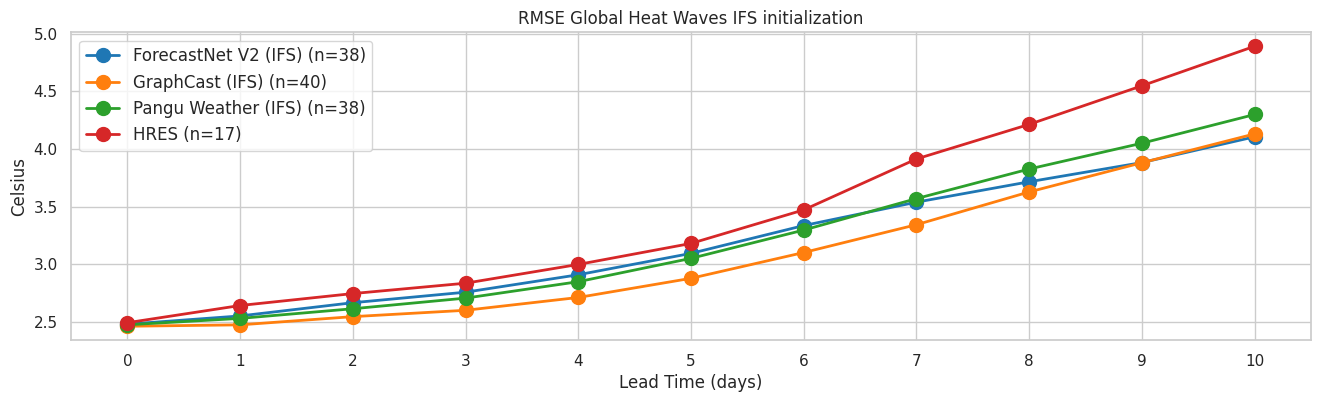

In [7]:
# plot the results for one metric for the three AI models versus HRES
fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')
hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz')


plot_results_by_metric(data=[fourv2_ifs_plot, gc_ifs_plot, pangu_ifs_plot, hres_plot], title='RMSE Global Heat Waves IFS initialization')


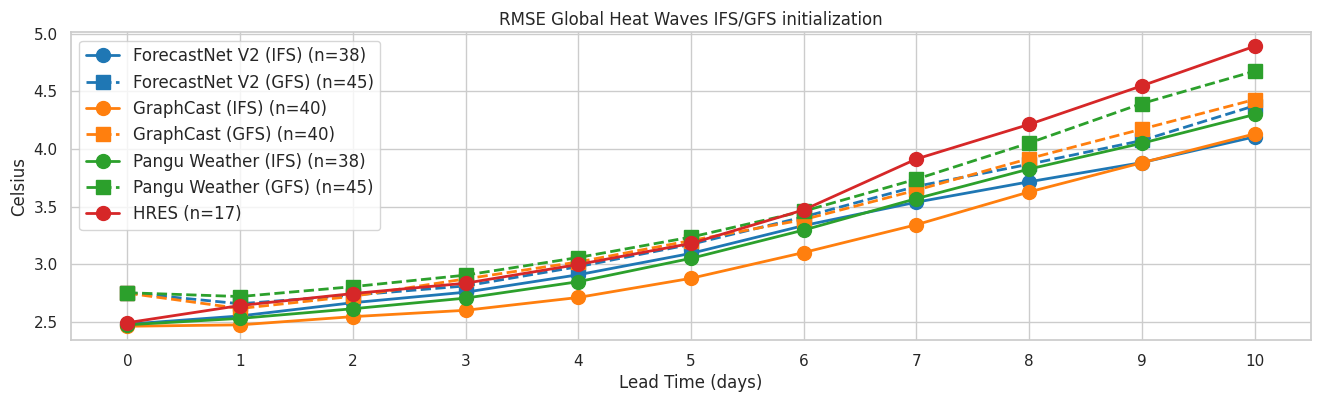

In [8]:
# compare IFS/GFS
fourv2_gfs_plot = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2 (GFS)', 'color': fourv2_color, 'linestyle':'--', 'marker':'s'}
gc_gfs_plot = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast (GFS)', 'color': gc_color, 'linestyle':'--', 'marker':'s'}
pangu_gfs_plot = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather (GFS)', 'color': pangu_color, 'linestyle':'--', 'marker':'s'}

fourv2_gfs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_gfs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_gfs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_gfs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_gfs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_gfs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')

plot_data = [fourv2_ifs_plot, fourv2_gfs_plot, gc_ifs_plot, gc_gfs_plot, pangu_ifs_plot, pangu_gfs_plot, hres_plot]

plot_results_by_metric(data=plot_data, title='RMSE Global Heat Waves IFS/GFS initialization')

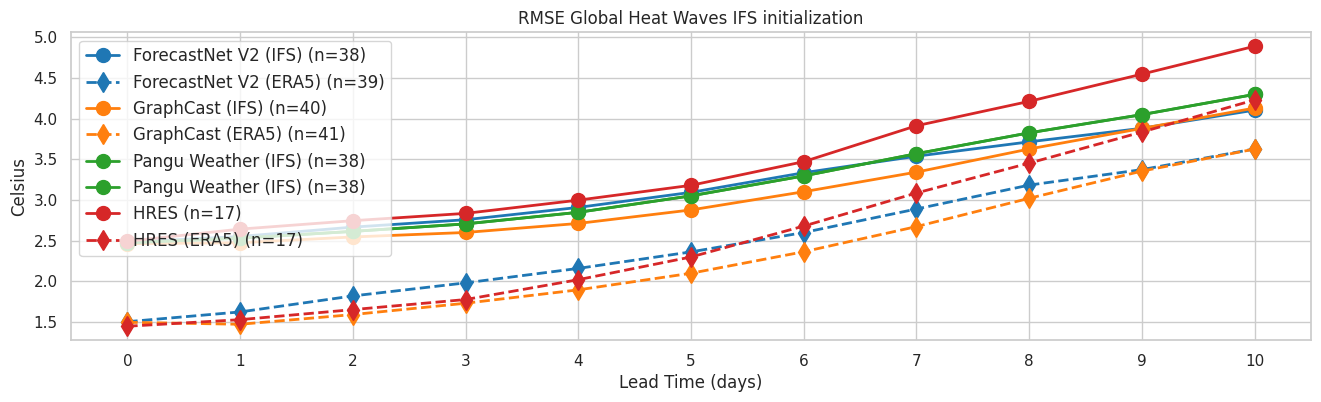

In [9]:
# plot ERA5 versus GHCN for IFS
fourv2_ifs_plot_era5 = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (ERA5)', 'color': fourv2_color, 'linestyle':'--', 'marker':'d'}
gc_ifs_plot_era5 = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (ERA5)', 'color': gc_color, 'linestyle':'--', 'marker':'d'}
pangu_ifs_plot_era5 = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (ERA5)', 'color': pangu_color, 'linestyle':'--', 'marker':'d'}
hres_plot_era5 = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES (ERA5)', 'color': hres_color, 'linestyle':'--', 'marker':'d'}

fourv2_ifs_plot_era5['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot_era5['forecast_source'], 
                                                     target_source='ERA5', metric='rmse', init_time='zeroz')
gc_ifs_plot_era5['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot_era5['forecast_source'], 
                                                 target_source='ERA5', metric='rmse', init_time='zeroz')
pangu_ifs_plot_era5['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot_era5['forecast_source'],
                                           target_source='ERA5', metric='rmse', init_time='zeroz')
hres_plot_era5['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot_era5['forecast_source'], 
                                    target_source='ERA5', metric='rmse', init_time='zeroz')


plot_data = [fourv2_ifs_plot, fourv2_ifs_plot_era5, gc_ifs_plot, gc_ifs_plot_era5, pangu_ifs_plot, pangu_ifs_plot, hres_plot, hres_plot_era5]
plot_results_by_metric(data=plot_data, title='RMSE Global Heat Waves IFS initialization')


# to do the analysis at the regional level, subset the data into regions

In [10]:
# helper function to convert a bounding box tuple to a shapely Polygon
def get_polygon_from_bounding_box(bounding_box):
    """Convert a bounding box tuple to a shapely Polygon."""
    if bounding_box is None:
        return None
    left_lon, right_lon, bot_lat, top_lat = bounding_box
    return Polygon(
        [
            (left_lon, bot_lat),
            (right_lon, bot_lat),
            (right_lon, top_lat),
            (left_lon, top_lat),
            (left_lon, bot_lat),
        ]
    )

# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = get_polygon_from_bounding_box(na_bounding_box)

# Europe bounding box
eu_bounding_box = [50, -15, 15, 75]
eu_bounding_box_polygon = get_polygon_from_bounding_box(eu_bounding_box)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = get_polygon_from_bounding_box(au_bounding_box)


In [11]:
# plot the boxes on a global map so we can see where they are

# helper function to plot a polygon on a cartopy axis
def plot_polygon(polygon, ax, color='yellow', alpha=0.5, my_zorder=1):
    """Plot a shapely Polygon on a Cartopy axis."""
    if polygon is None:
        return
    patch = patches.Polygon(
        polygon.exterior.coords,
        closed=True,
        facecolor=color,
        edgecolor=color,
        alpha=alpha,
        linewidth=2,
        zorder=my_zorder,
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(patch)

# helper function to plot a polygon on a cartopy axis
def plot_polygon_outline(polygon, ax, color='yellow', alpha=0.5, my_zorder=1):
    """Plot a shapely Polygon on a Cartopy axis."""
    if polygon is None:
        return
    patch = patches.Polygon(
        polygon.exterior.coords,
        closed=True,
        facecolor='none',
        edgecolor=color,
        alpha=alpha,
        linewidth=2,
        zorder=my_zorder,
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(patch)


# main plotting function for plotting all cases
def plot_boxes(box_list, box_names, title, filename=None):
    # plot all cases on one giant world map
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
        
    # Add coastlines and gridlines
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white')
    ax.add_feature(cfeature.RIVERS, edgecolor='black')

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='black', alpha=1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    # Define colors for each event type
    # use seaborn color palette for colorblind friendly colors
    sns_palette = sns.color_palette("tab10")
    sns.set_style("whitegrid")

    # Plot boxes for each case
    for box in box_list:
        plot_polygon_outline(box, ax, color='blue', alpha=1)

    plt.legend(loc='lower left', fontsize=12)
    ax.set_title(title, loc='left', fontsize=20)
    
    # save if there is a filename specified (otherwise the user just wants to see the plot)
    if filename is not None:
        plt.savefig(filename, transparent=False, bbox_inches='tight', dpi=300)

/tmp/ipykernel_26618/3761302962.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=12)


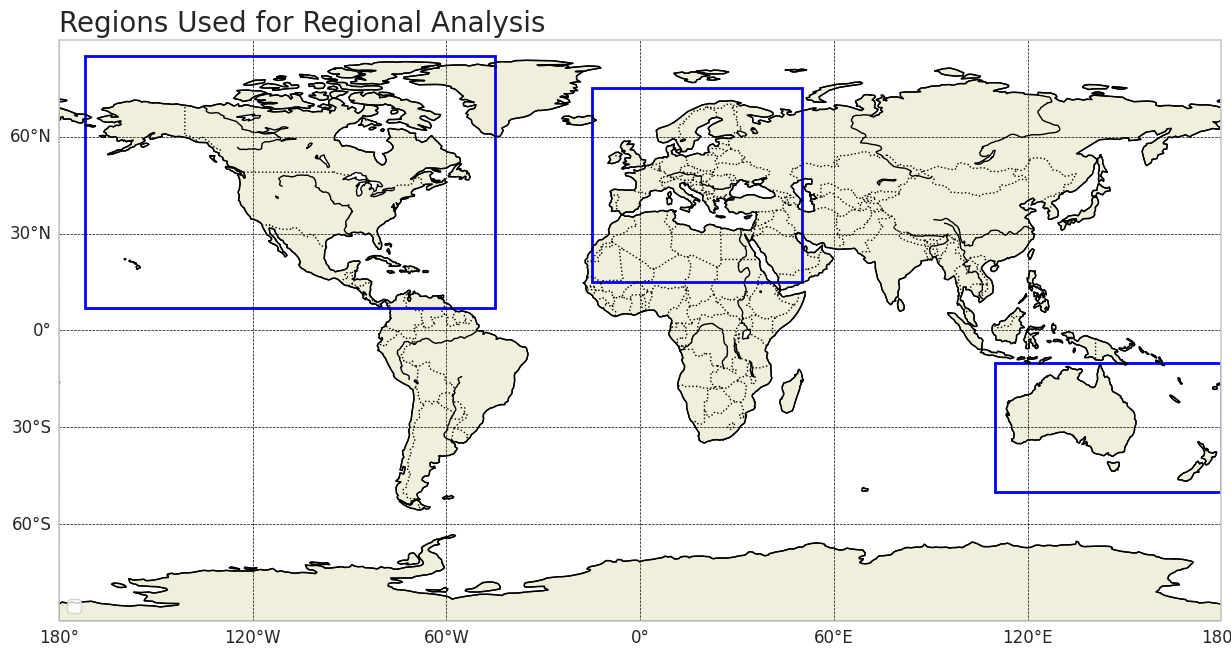

In [12]:
plot_boxes(
    box_list=[na_bounding_box_polygon, eu_bounding_box_polygon, au_bounding_box_polygon],
    box_names=['North America', 'Europe', 'Australia'],
    title='Regions Used for Regional Analysis',
    filename=basepath + 'docs/notebooks/figs/figure3_part1_regions.png'
)

In [13]:
# main plotting function for plotting all cases
def plot_all_cases(ewb_cases, event_type=None, filename=None, bounding_box=None, fill_boxes=False, event_id=None):
    """A function to plot all cases
    Args:
        ewb_cases (list): A list of cases to plot.
        event_type (str): The type of event to plot. If None, all events will be plotted).
        filename (str): The name of the file to save the plot. If None, the plot will not be saved.
        bounding_box (tuple): A tuple of the form (min_lon, min_lat, max_lon, max_lat) to set the bounding box for the plot. If None, the full world map will be plotted.
    """
    # plot all cases on one giant world map
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # plot the full map or a subset if bounding_box is specified
    if (bounding_box is None):
        ax.set_global()
    else:
        ax.set_extent(bounding_box, crs=ccrs.PlateCarree())
    
    # save the bounding box polygon to subset the counts later
    if (bounding_box is not None):
        bounding_box_polygon = get_polygon_from_bounding_box(bounding_box)
        #plot_polygon(bounding_box_polygon, ax, color='yellow', alpha=0.5)
        
    # Add coastlines and gridlines
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='white')
    ax.add_feature(cfeature.RIVERS, edgecolor='black')

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    # Define colors for each event type
    # use seaborn color palette for colorblind friendly colors
    sns_palette = sns.color_palette("tab10")
    sns.set_style("whitegrid")

    event_colors = {'freeze': sns_palette[0], 'heat_wave': sns_palette[3],'tropical_cyclone': sns_palette[1],
                    'severe_convection': sns_palette[5], 'atmospheric_river': sns_palette[7],
        }

    # Initialize counts for each event type
    counts_by_type = {'freeze': 0, 'heat_wave': 0, 'severe_convection': 0, 'atmospheric_river': 0, 'tropical_cyclone': 0}
    zorders = {'freeze': 10, 'heat_wave': 9, 'atmospheric_river': 2, 'tropical_cyclone': 1, 'severe_convection': 0}
    alphas = {'freeze': 0.2, 'heat_wave': 0.2, 'atmospheric_river': 0.2, 'tropical_cyclone': 0.2, 'severe_convection': 0.05}

    # Plot boxes for each case
    for indiv_case in ewb_cases.cases:
        # Get color based on event type
        indiv_event_type = indiv_case.event_type
        color = event_colors.get(indiv_event_type, 'gray')  # Default to gray if event type not found

        # check if the case is inside the bounding box
        if bounding_box is not None:
            if (not shapely.intersects(indiv_case.location.geopandas.geometry[0], bounding_box_polygon)):
                #print(f"Skipping case {indiv_case.case_id_number} as it is outside the bounding box.")
                continue
        
        # Plot the case geopandas info
        if (event_type is None or indiv_event_type == event_type and event_id is None) or (event_id is not None and indiv_case.case_id_number == event_id):
            if (fill_boxes):
                # to handle wrapping around the prime meridian, we can't use geopandas plot (and besides it is slow)
                # instead we have multi-polygon patches if it wraps around and we need to plot each polygon separately
                if isinstance(indiv_case.location.geopandas.geometry.iloc[0], shapely.geometry.MultiPolygon):
                    for poly in indiv_case.location.geopandas.geometry.iloc[0].geoms:
                        plot_polygon(poly, ax, color=color, alpha=alphas[indiv_event_type], my_zorder=zorders[indiv_event_type])
                else:
                    plot_polygon(indiv_case.location.geopandas.geometry.iloc[0], ax, color=color, 
                                alpha=alphas[indiv_event_type], my_zorder=zorders[indiv_event_type])
            else:
                # to handle wrapping around the prime meridian, we can't use geopandas plot (and besides it is slow)
                # instead we have multi-polygon patches if it wraps around and we need to plot each polygon separately
                if isinstance(indiv_case.location.geopandas.geometry.iloc[0], shapely.geometry.MultiPolygon):
                    for poly in indiv_case.location.geopandas.geometry.iloc[0].geoms:
                        plot_polygon_outline(poly, ax, color=color, alpha=1, my_zorder=zorders[indiv_event_type])
                else:
                    plot_polygon_outline(indiv_case.location.geopandas.geometry.iloc[0], ax, color=color, 
                                alpha=1, my_zorder=zorders[indiv_event_type])

            # count the events by type
            counts_by_type[indiv_event_type] += 1

        
    # Create a custom legend for event types
    if (event_type is not None):
        # if we are only plotting one event type, only show that in the legend
        legend_elements = [
            Patch(facecolor=event_colors[event_type], alpha=0.9, label=f'{event_type.replace("_", " ").title()} (n = %d)' % counts_by_type[event_type]),
        ]
    else:
        # otherwise show all event types in the legend
        legend_elements = [
            Patch(facecolor=event_colors['heat_wave'], alpha=0.9, label='Heat Wave (n = %d)' % counts_by_type['heat_wave']),
            Patch(facecolor=event_colors['freeze'], alpha=0.9, label='Freeze (n = %d)' % counts_by_type['freeze']),
            Patch(facecolor=event_colors['severe_convection'], alpha=0.9, label='Convection (n = %d)' % counts_by_type['severe_convection']),
            Patch(facecolor=event_colors['atmospheric_river'], alpha=0.9, label='Atmospheric River (n = %d)' % counts_by_type['atmospheric_river']),
            Patch(facecolor=event_colors['tropical_cyclone'], alpha=0.9, label='Tropical Cyclone (n = %d)' % counts_by_type['tropical_cyclone']),
        ]

    # Create a larger legend by specifying a larger font size in the prop dictionary
    ax.legend(handles=legend_elements, loc='lower left', framealpha=1, frameon=True, borderpad=0.5, handletextpad=0.8, handlelength=2.5)
    if (event_type is None):
        title = 'ExtremeWeatherBench Cases (n = %d)' % sum(counts_by_type.values())
    else:
        title = f'ExtremeWeatherBench Cases: {event_type.replace("_", " ").title()} (n = %d)' % counts_by_type[event_type]

    if (event_id is not None):
        title = f'ExtremeWeatherBench Case ID: {event_id}'
    
    ax.set_title(title, loc='left', fontsize=20)
    
    # save if there is a filename specified (otherwise the user just wants to see the plot)
    if filename is not None:
        plt.savefig(filename, transparent=False, bbox_inches='tight', dpi=300)

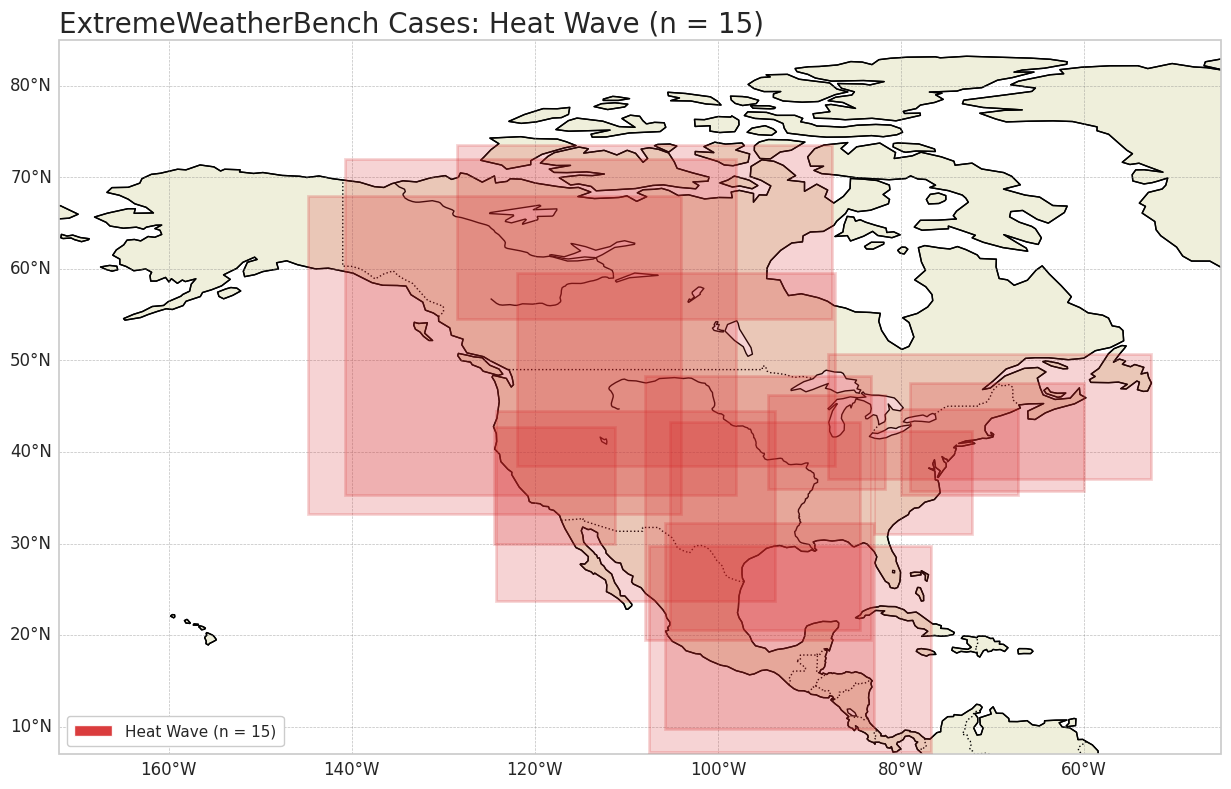

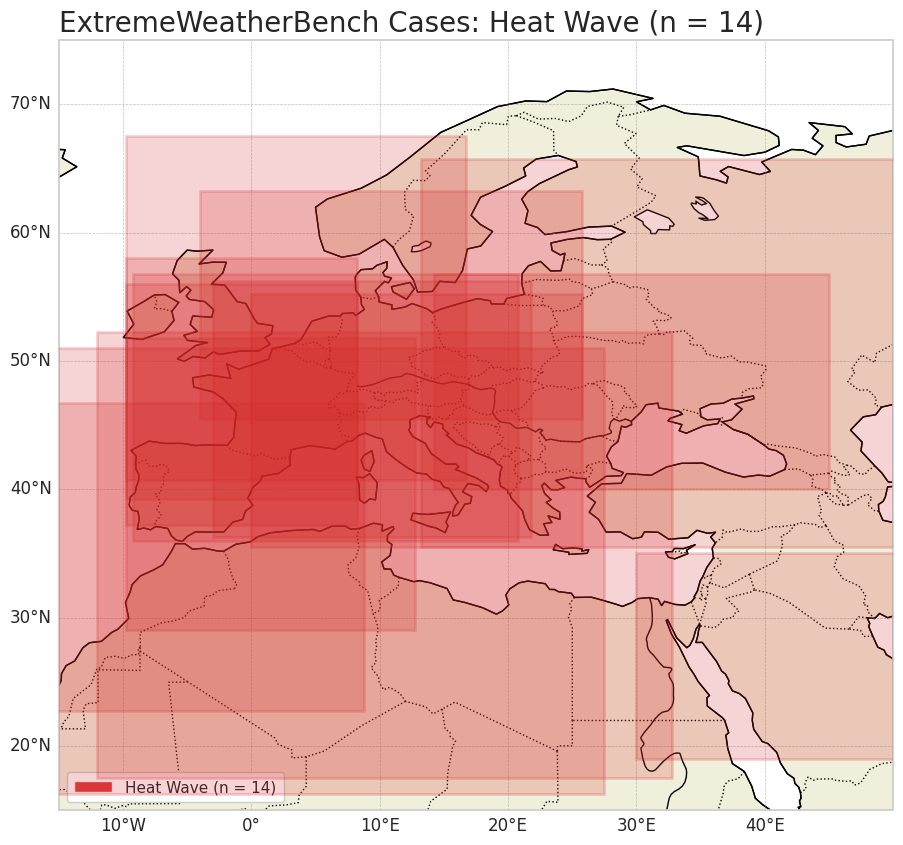

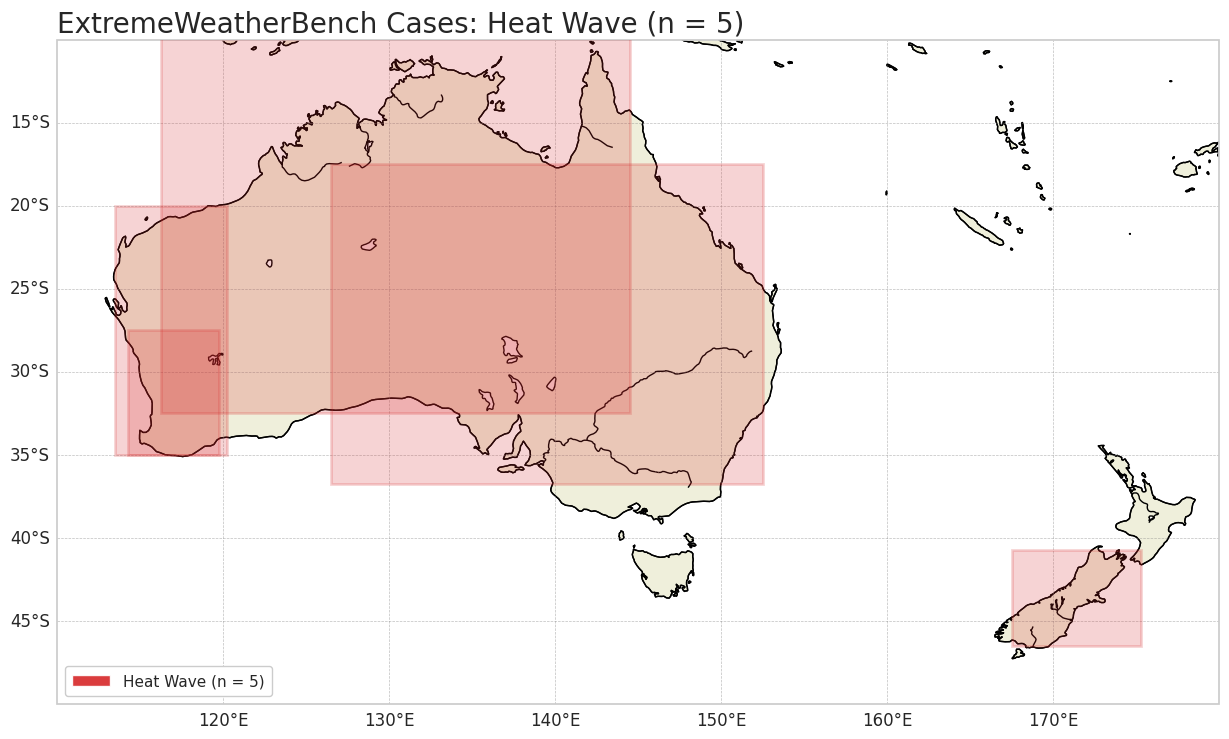

In [14]:
# plot North America cases
plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=na_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_NA.png', fill_boxes=True)

plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=eu_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_EU.png', fill_boxes=True)

plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=au_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_AU.png', fill_boxes=True)

In [193]:
# break the cases into different lists
na_cases = list()
eu_cases = list()
au_cases = list()

for heat_case in ewb_fourv2.case_operators:
    #print(heat_case.case_metadata)

    my_case = heat_case.case_metadata

    # collect the North America, Europe, and Australia cases
    if (shapely.intersects(my_case.location.geopandas.geometry[0], na_bounding_box_polygon)):
        na_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], eu_bounding_box_polygon)):
        eu_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], au_bounding_box_polygon)):
        au_cases.append(my_case.case_id_number)

print(f'North America Cases: {na_cases}')
print(f'Europe Cases: {eu_cases}')
print(f'Australia Cases: {au_cases}')


In [208]:
# plot the results for one metric for the three AI models versus HRES
na_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
na_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
na_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
na_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

na_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)


plot_results_by_metric(data=[na_fourv2_ifs_plot, na_gc_ifs_plot, na_pangu_ifs_plot, na_hres_plot], title='RMSE North American Heat Waves IFS initialization')


In [ ]:
# look through the north america cases to decide which one to look in depth
for heat_case in ewb_cases.cases:
    
    if (heat_case.case_id_number in na_cases):
        print(heat_case)  

        #plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=na_bounding_box, fill_boxes=True, event_id=my_case.case_id_number)



In [ ]:
# going to dive into case 3 in more detail
for case in ewb_cases.cases:
    if (case.case_id_number == 3):
        my_case = case
        print(my_case)
        break

In [ ]:
na_fourv2_era5_results[na_fourv2_era5_results['case_id_number'] == my_case.case_id_number]

In [ ]:
def plot_individual_case_results_by_metric(metric='rmse', filename=None, title='RMSE for All Heat Waves', 
                           fourv2_ghcn=na_fourv2_ghcn_results, pang_ghcn=na_pang_ghcn_results, hres_ghcn=na_hres_ghcn_results,
                           gc_ghcn=na_gc_ghcn_results,
                           global_fourv2_ghcn=fourv2_ghcn_results, global_pang_ghcn=pang_ghcn_results, global_hres_ghcn=hres_ghcn_results,
                           global_gc_ghcn=gc_ghcn_results,
                           forecast_hour=None, event_id=None):
    
    # subset the results to just this metric and event id
    fourv2_ghcn = fourv2_ghcn[fourv2_ghcn['case_id_number'] == my_case.case_id_number]
    fourv2_ghcn = fourv2_ghcn[fourv2_ghcn['metric'] == metric]
    lead_times = fourv2_ghcn['lead_time'].values

    pang_ghcn = pang_ghcn[pang_ghcn['case_id_number'] == my_case.case_id_number]
    pang_ghcn = pang_ghcn[pang_ghcn['metric'] == metric]

    hres_ghcn = hres_ghcn[hres_ghcn['case_id_number'] == my_case.case_id_number]
    hres_ghcn = hres_ghcn[hres_ghcn['metric'] == metric]

    gc_ghcn = gc_ghcn[gc_ghcn['case_id_number'] == my_case.case_id_number]
    gc_ghcn = gc_ghcn[gc_ghcn['metric'] == metric]

    if (forecast_hour == "zeroz"):
        # extract the 0z runs
        my_times = [idx for idx, n in enumerate(lead_times) if n.seconds % 86400 == 0]
    elif (forecast_hour == "twelvez"):
        # extract the 12z runs
        my_times = [idx for idx, n in enumerate(lead_times) if n.seconds % 86400 == 43200]

    # if forecast hour is specified, grab the runs matching those times
    if (forecast_hour is not None):
        fourv2_ghcn = fourv2_ghcn.iloc[my_times]
        pang_ghcn = pang_ghcn.iloc[my_times]
        hres_ghcn = hres_ghcn.iloc[my_times] 
        gc_ghcn = gc_ghcn.iloc[my_times]   


     # grab the global results for reference lines
    global_fourv2_ghcn_group = global_fourv2_ghcn[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean().reset_index()
    global_fourv2_ghcn_pivot = global_fourv2_ghcn_group[global_fourv2_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    global_pang_ghcn_group = global_pang_ghcn[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean().reset_index()
    global_pang_ghcn_pivot = global_pang_ghcn_group[global_pang_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    global_hres_ghcn_group = global_hres_ghcn[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean().reset_index()
    global_hres_ghcn_pivot = global_hres_ghcn_group[global_hres_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    global_gc_ghcn_group = global_gc_ghcn[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean().reset_index()
    global_gc_ghcn_pivot = global_gc_ghcn_group[global_gc_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

     # if forecast hour is specified, grab the runs matching those times
    
    if (forecast_hour == "zeroz"):
        # extract the 0z runs
        time_diff = global_fourv2_ghcn_pivot.columns.seconds % 86400 == 0
        my_times = [idx for idx, n in enumerate(time_diff) if n]
    elif (forecast_hour == "twelvez"):
        # extract the 12z runs
        time_diff = global_fourv2_ghcn_pivot.columns.seconds % 86400 == 43200
        my_times = [idx for idx, n in enumerate(time_diff) if n]

    if (forecast_hour is not None):
        global_fourv2_ghcn_pivot = global_fourv2_ghcn_pivot.iloc[:, my_times]
        global_pang_ghcn_pivot = global_pang_ghcn_pivot.iloc[:, my_times]
        global_hres_ghcn_pivot = global_hres_ghcn_pivot.iloc[:, my_times]  
        global_gc_ghcn_pivot = global_gc_ghcn_pivot.iloc[:, my_times]



    #print(fourv2_ghcn)

    # make the plots
    sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots(figsize=(15,4))
    fourv2_ghcn_values = fourv2_ghcn['value'].values
    pang_ghcn_values = pang_ghcn['value'].values
    hres_ghcn_values = hres_ghcn['value'].values
    gc_ghcn_values = gc_ghcn['value'].values

    global_fourv2_ghcn_values = global_fourv2_ghcn_pivot.loc[metric].values
    global_pang_ghcn_values = global_pang_ghcn_pivot.loc[metric].values
    global_hres_ghcn_values = global_hres_ghcn_pivot.loc[metric].values
    global_gc_ghcn_values = global_gc_ghcn_pivot.loc[metric].values

    #print(fourv2_ghcn_values)

    plt.plot(np.flip(fourv2_ghcn_values), color=fourv2_color, label='FourCastNet V2 GHCN')
    plt.plot(np.flip(global_fourv2_ghcn_values), color=fourv2_color, linestyle=':', label='Global FourCastNet V2 GHCN')

    plt.plot(np.flip(pang_ghcn_values), color=pangu_color, label='Pangu Weather GHCN')
    plt.plot(np.flip(global_pang_ghcn_values), color=pangu_color, linestyle=':', label='Global Pangu Weather GHCN')

    plt.plot(np.flip(hres_ghcn_values), color=hres_color, label='HRES GHCN')
    plt.plot(np.flip(global_hres_ghcn_values), color=hres_color, linestyle=':', label='Global HRES GHCN')

    plt.plot(np.flip(gc_ghcn_values), color=gc_color, label='GraphCast GHCN')
    plt.plot(np.flip(global_gc_ghcn_values), color=gc_color, linestyle=':', label='Global GraphCast GHCN')

    # make the xticklabels more readable and show every other one
    # print(np.arange(0, len(merged_pivot.columns), 2))
    # print(merged_pivot.columns[::2])
    ax.set_xticks(rotation=90, labels=np.flip(fourv2_ghcn['lead_time']), ticks=np.arange(0, len(fourv2_ghcn_values)))
    #ax.set_xticks(ticks=np.arange(0, len(merged_pivot.columns), 2))

    ax.set_ylabel('Celsius')
    ax.set_xlabel('Initialization Time')
    plt.title(title)
    #ax.grid(True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)
    plt.legend()

    if (filename is not None):
        plt.savefig(filename, bbox_inches='tight', dpi=300)

In [ ]:
fourv2_ghcn = na_fourv2_ghcn_results[na_fourv2_ghcn_results['case_id_number'] == my_case.case_id_number]
fourv2_ghcn = fourv2_ghcn[fourv2_ghcn['metric'] == 'rmse']
lead_times = fourv2_ghcn['lead_time'].values
#print(lead_times)

my_times = [idx for idx, n in enumerate(lead_times) if n.seconds % 86400 == 0]
print(my_times)

# grab the runs matching those times
fourv2_ghcn.iloc[my_times]



In [ ]:
plot_individual_case_results_by_metric(metric='rmse', title='RMSE for 0Z Case ID 3', 
                       fourv2_ghcn=na_fourv2_ghcn_results, pang_ghcn=na_pang_ghcn_results, hres_ghcn=na_hres_ghcn_results, 
                       global_fourv2_ghcn=fourv2_ghcn_results, global_hres_ghcn=hres_ghcn_results, global_pang_ghcn=pang_ghcn_results,
                       forecast_hour='zeroz', event_id=my_case.case_id_number)

plot_individual_case_results_by_metric(metric='maximum_mae', title='Maxmimum MAE for 0Z Case ID 3', 
                       fourv2_ghcn=na_fourv2_ghcn_results, pang_ghcn=na_pang_ghcn_results, hres_ghcn=na_hres_ghcn_results, 
                       global_fourv2_ghcn=fourv2_ghcn_results, global_hres_ghcn=hres_ghcn_results, global_pang_ghcn=pang_ghcn_results,
                       forecast_hour='zeroz', event_id=my_case.case_id_number)

In [ ]:
def celsius_colormap_and_normalize() -> tuple[mcolors.Colormap, mcolors.Normalize]:
    """Gets the colormap and normalization for 2m temperature.

    Uses a custom colormap for temperature in Celsius.

    Returns:
        A tuple (cmap, norm) for plotting.
    """
    lo_colors = [
        "#E4C7F4",
        "#E53885",
        "#C17CBE",
        "#694396",
        "#CBCCE9",
        "#6361BD",
        "#77FBFE",
    ]
    hi_colors = [
        "#8CE9B0",
        "#479F31",
        "#F0F988",
        "#AD311B",
        "#ECB9F1",
        "#7F266F",
    ]
    colors = lo_colors + hi_colors

    # Calculate the position where we want the 0C jump
    lo = -67.8  
    hi = 54.4  
    threshold = 0  
    threshold_pos = (threshold - lo) / (hi - lo)  # normalize 0°C position to [0,1]

    # Create positions for colors with a small gap around zero_pos
    positions = np.concatenate(
        [
            np.linspace(
                0, threshold_pos - 0.02, len(lo_colors)
            ),  # Colors up to white
            # [threshold_pos],  # White position
            np.linspace(
                threshold_pos + 0.02, 1, len(hi_colors)
            ),  # Colors after white
        ]
    )

    return mcolors.LinearSegmentedColormap.from_list(
        "temp_colormap", list(zip(positions, colors))
    ), mcolors.Normalize(vmin=lo, vmax=hi)


def convert_day_yearofday_to_time(dataset: xr.Dataset, year: int) -> xr.Dataset:
    """Convert dayofyear and hour coordinates in an xarray Dataset to a new time
    coordinate.

    Args:
        dataset: The input xarray dataset.
        year: The base year to use for the time coordinate.

    Returns:
        The dataset with a new time coordinate.
    """
    # Create a new time coordinate by combining dayofyear and hour
    time_dim = pd.date_range(
        start=f"{year}-01-01",
        periods=len(dataset["dayofyear"]) * len(dataset["hour"]),
        freq="6h",
    )
    dataset = dataset.stack(time=("dayofyear", "hour"))
    # Assign the new time coordinate to the dataset
    dataset = (dataset.drop_vars(['time', 'dayofyear', 'hour'])
               .assign_coords(time=time_dim))

    return dataset

def generate_heatwave_dataset(
    era5: xr.Dataset,
    climatology: xr.Dataset,
    single_case: cases.IndividualCase,
):
    """Calculate the times where regional average of temperature is above the climatology.
    
    Args:
        era5: ERA5 dataset containing 2m_temperature
        climatology: BB climatology containing surface_temperature_85th_percentile
        single_case: cases.IndividualCase object with associated metadata
    """
    era5_case = era5[["2m_temperature"]].sel(
        time=slice(single_case.start_date, single_case.end_date)
    )
    subset_climatology = convert_day_yearofday_to_time(
        climatology, np.unique(era5_case.time.dt.year.values)[0]
    )
    merged_dataset = xr.merge(
        [
            subset_climatology.rename(
                {"2m_temperature": "surface_temperature_85th_percentile"}
            ),
            era5_case,
        ],
        join="inner",
    )
    if (
        single_case.location.longitude_min < 0 or 
        single_case.location.longitude_min > 180 
        ) and (
        single_case.location.longitude_max > 0 and
        single_case.location.longitude_max < 180
            ):
                merged_dataset = utils.convert_longitude_to_180(merged_dataset)
    merged_dataset = merged_dataset.sel(
        latitude=slice(single_case.location.latitude_max, single_case.location.latitude_min),
        longitude=slice(single_case.location.longitude_min, single_case.location.longitude_max),
    )
    return merged_dataset

def generate_heatwave_plots(
    heatwave_dataset: xr.Dataset,
    single_case: cases.IndividualCase,
):
    """Plot the max timestep of the heatwave event and the average regional temperature time series
    on separate plots.
    
    Args:
        heatwave_dataset: contains 2m_temperature, surface_temperature_85th_percentile,
        time, latitude, longitude
        single_case: cases.IndividualCase object with associated metadata
    """
    time_based_heatwave_dataset = heatwave_dataset.mean(["latitude", "longitude"])
    # Plot 1: Min timestep of the heatwave event
    fig1, ax1 = plt.subplots(
        figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()}
    )
    # Select the timestep with the maximum spatially averagedtemperature
    subset_timestep = (
        time_based_heatwave_dataset['time'][time_based_heatwave_dataset["2m_temperature"]
        .argmax()]
    )
    # Mask places where temperature >= 85th percentile climatology
    temp_data = heatwave_dataset["2m_temperature"] - 273.15
    climatology_data = heatwave_dataset["surface_temperature_85th_percentile"] - 273.15
    
    # Create mask for values where temp > climatology (heatwave condition)
    mask = temp_data > climatology_data
    
    # Apply mask to temperature data
    masked_temp = temp_data.where(mask)
    cmap, norm = celsius_colormap_and_normalize()
    im = (
        masked_temp
        .sel(time=subset_timestep)
        .plot(
            ax=ax1,
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            norm=norm,
            add_colorbar=False,
        )
    )
    (
        temp_data
        .sel(time=subset_timestep)
        .plot.contour(
            ax=ax1,
            levels=[0],
            colors='r',
            linewidths=0.75,
            ls=':',
            transform=ccrs.PlateCarree(),
        )
    )   
    # Add coastlines and gridlines
    ax1.coastlines()
    ax1.add_feature(cfeature.BORDERS, linestyle=":")
    ax1.add_feature(cfeature.LAND, edgecolor="black")
    ax1.add_feature(cfeature.LAKES, edgecolor="black")
    ax1.add_feature(cfeature.RIVERS, edgecolor=[ 0.59375 , 0.71484375, 0.8828125 ],alpha=0.5)
    ax1.add_feature(cfeature.STATES, edgecolor="grey")
    # Add gridlines
    gl = ax1.gridlines(draw_labels=True,alpha=0.25)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    gl.xlabel_style = {"size": 12, "color": "k"}
    gl.ylabel_style = {"size": 12, "color": "k"}
    ax1.set_title('') # clears the default xarray title
    ax1.set_title(
        f"Temperature Where > 85th Percentile Climatology\n"
        f"{single_case.title}, Case ID {single_case.case_id_number}\n"
        f"{heatwave_dataset['time'].sel(time=subset_timestep).dt.strftime('%Y-%m-%d %Hz').values}", 
        loc='left'
    )
    # Add the location coordinate as a dot on the map
    ax1.tick_params(axis='y', which='major', labelsize=12)
    # Create a colorbar with the same height as the plot
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
    cbar = fig1.colorbar(im, cax=cax, label="Temp > 85th Percentile (C)")
    cbar.set_label("Temperature (C)", size=14)
    cbar.ax.tick_params(labelsize=12)

    plt.tight_layout()
    plt.savefig(f"case_{single_case.case_id_number}_spatial.png",transparent=True)
    plt.show()

    # Plot 2: Average regional temperature time series
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    lss = ["-.", "-"]
    lc = ["k", "tab:red"]
    lws = [0.75, 1.5]
    for i, variable in enumerate(time_based_heatwave_dataset):
        (time_based_heatwave_dataset[variable] - 273.15).plot(
            ax=ax2, label=variable, lw=lws[i], ls=lss[i], c=lc[i]
        )
    ax2.legend(fontsize=12)
    mask = (
        time_based_heatwave_dataset["2m_temperature"]
        < time_based_heatwave_dataset["surface_temperature_85th_percentile"]
    )
    start = None
    for i, val in enumerate(mask.values):
        if val and start is None:
            start = time_based_heatwave_dataset.time[i].values
        elif not val and start is not None:
            ax2.axvspan(
                start,
                time_based_heatwave_dataset.time[i].values,
                color="red",
                alpha=0.1,
            )
            start = None
    if start is not None:
        ax2.axvspan(
            start, time_based_heatwave_dataset.time[-1].values, color="red", alpha=0.1
        )
    ax2.set_title('')
    ax2.set_title("Spatially Averaged Heatwave Event vs 85th Percentile Climatology", 
    fontsize=14, loc='left')
    ax2.set_ylabel("Temperature (C)", fontsize=12)
    ax2.set_xlabel("Time", fontsize=12)
    ax2.tick_params(axis="x", labelsize=12)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
    ax2.xaxis.set_tick_params(rotation=45, labelsize=10, pad=0.0001,)
    ax2.tick_params(axis="y", labelsize=12)
    
    # Create legend handles including the axvspan
    from matplotlib.patches import Patch
    legend_elements = [
        plt.Line2D([0], [0], color='k', linestyle='-.', linewidth=0.75, 
                   label='2m Temperature, 85th Percentile'),
        plt.Line2D([0], [0], color='tab:red', linestyle='-', linewidth=1.5, 
                   label='2m Temperature'),
        Patch(facecolor='red', alpha=0.1, label='Above 85th Percentile')
    ]
    ax2.legend(handles=legend_elements, fontsize=12)
    
    ax2.tick_params(axis='y', which='major', labelsize=12)
    plt.tight_layout()
    plt.savefig(f"case_{single_case.case_id_number}_timeseries.png",transparent=True)
    plt.show()

era5 = defaults.era5_heatwave_target.open_and_maybe_preprocess_data_from_source()
temp_climatology_ds = xr.open_zarr('gs://extremeweatherbench/datasets/surface_air_temperature_1990_2019_climatology.zarr/')
temp_climatology_ds = temp_climatology_ds.sel(quantile=0.85)
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()
ewb_case = cases.load_individual_cases(case_dict)
ewb_case = [n for n in ewb_case.cases if n.event_type == "heat_wave"][0]
heatwave_dataset = generate_heatwave_dataset(era5, temp_climatology_ds, ewb_case)
generate_heatwave_plots(heatwave_dataset, ewb_case)